## Building a Neural Network from Scratch

### Rio Agustian Gilang Fernando

Ini adalah kode belajar membuat neural network dari nol hanya menggunakan panda, numpy, dan matplotlib. Video tutorial dari kode ini dapat dilihat di sini.

https://youtu.be/w8yWXqWQYmU?si=ctYBEOqhJOZdJKXL

Kode ini merupakan salinan dari kode berikut. 

https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\Rio Agustian\Documents\S2\CODE\train.csv\train.csv")

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 225

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_, m_train = X_train.shape

In [27]:
def init_params():
    W1 = np.random.rand(10, 784) * 0.05
    b1 = np.random.rand(10, 1) * 0.05
    W2 = np.random.rand(10, 10) * 0.05
    b2 = np.random.rand(10, 1) * 0.05
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

# def softmax(Z):
#     A = np.exp(Z) / np.sum(np.exp(Z))
#     return A

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [28]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print('Iterations: ', i)
            predictions = get_predictions(A2)
            print('Accuracy: ', get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [29]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iterations:  0
[9 9 9 ... 9 9 9] [3 1 0 ... 9 9 1]
Accuracy:  0.09951219512195122
Iterations:  10
[0 0 0 ... 0 0 0] [3 1 0 ... 9 9 1]
Accuracy:  0.09829268292682927
Iterations:  20
[0 0 0 ... 0 0 0] [3 1 0 ... 9 9 1]
Accuracy:  0.09829268292682927
Iterations:  30
[0 0 0 ... 0 0 2] [3 1 0 ... 9 9 1]
Accuracy:  0.09839024390243903
Iterations:  40
[0 8 0 ... 0 0 2] [3 1 0 ... 9 9 1]
Accuracy:  0.14980487804878048
Iterations:  50
[3 8 0 ... 9 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.37826829268292683
Iterations:  60
[3 1 0 ... 7 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.5223658536585366
Iterations:  70
[3 1 0 ... 7 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.5771463414634146
Iterations:  80
[3 1 0 ... 7 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.6232439024390244
Iterations:  90
[3 1 0 ... 7 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.6700243902439025
Iterations:  100
[3 1 0 ... 9 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.7034878048780487
Iterations:  110
[3 1 0 ... 9 7 1] [3 1 0 ... 9 9 1]
Accuracy:  0.7306585365853658
Iteration

In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print('Predictions: ', prediction)
    print('Label: ', label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, cmap='gray', interpolation='nearest')
    plt.show()

Predictions:  [3]
Label:  3


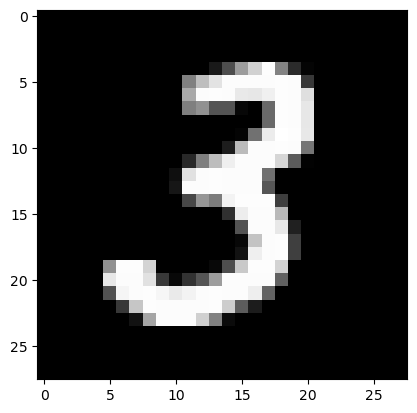

In [33]:
test_predictions(0, W1, b1, W2, b2)

In [30]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 0 2 8 0 0 2 6 7 0 6 7 3 9 1 6 4 5 1 8 4 9 8 2 3 9 1 5 5 3 5 2 7 3 1 5 6
 6 4 2 0 1 1 8 8 0 0 4 8 1 7 2 0 6 8 3 9 5 7 6 3 5 8 7 4 7 8 4 6 5 6 1 5 1
 8 6 4 7 2 6 3 4 9 1 6 8 3 7 1 8 5 8 5 2 9 4 0 0 8 8 7 5 8 5 0 9 2 5 7 6 7
 7 3 6 2 4 9 0 1 6 1 8 1 5 8 5 0 5 2 9 9 4 8 3 8 2 5 0 3 3 6 9 6 9 3 3 2 0
 1 2 5 5 6 7 6 5 0 8 2 2 1 1 9 9 9 4 8 4 3 3 1 2 1 1 5 8 7 5 8 5 6 4 8 2 1
 2 1 3 3 9 1 7 4 4 2 2 7 2 2 8 8 5 6 0 1 8 9 1 2 1 9 4 0 1 4 1 1 3 6 9 7 2
 0 4 2 8 3 4 0 0 7 3 2 4 4 3 7 1 3 0 9 8 7 3 0 2 0 1 9 1 7 9 9 1 3 7 9 8 8
 3 8 2 7 1 8 4 5 1 0 8 0 0 1 5 3 5 2 2 6 6 7 4 6 3 5 0 2 6 7 0 2 2 8 9 0 0
 6 1 9 4 2 1 5 6 6 3 6 5 2 5 3 1 1 9 8 0 8 6 5 1 7 8 3 5 2 1 9 6 8 2 5 1 1
 5 3 0 4 8 6 6 6 8 5 3 6 7 0 0 5 4 4 5 7 0 1 9 3 9 3 3 7 2 1 9 7 8 2 7 2 6
 9 2 3 2 9 0 0 0 7 0 8 2 4 2 9 4 0 0 2 9 7 8 3 4 1 0 9 4 7 4 2 1 5 3 3 0 0
 3 9 3 7 5 6 1 2 2 7 5 0 4 8 7 1 6 9 0 9 9 0 3 7 9 6 6 5 9 4 6 7 0 1 0 3 3
 6 2 5 2 9 6 3 8 2 4 5 1 2 8 0 8 7 3 4 6 7 5 1 7 4 2 0 6 8 4 4 3 8 7 3 5 6
 1 2 7 2 5 5 8 1 6 1 6 2 

0.891